In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from operator import attrgetter
from matplotlib.patches import Ellipse
from math import atan2,degrees
import numpy.random as rnd

In [7]:
points = pd.read_csv('Clustering.csv',sep=',')

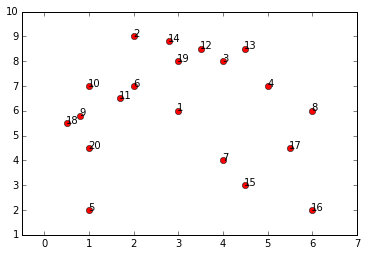

In [8]:
plt.plot(points.X, points.Y, 'ro')
plt.axis([min(points.X)-1, max(points.X)+1, min(points.Y)-1, max(points.Y)+1])
for i, txt in enumerate(points.index):
    plt.annotate(txt+1, (points.X[i],points.Y[i]))
plt.show()

In [9]:
class Dist:
    def __init__(self,p1indx,p2indx,dist):
        self.p1 = p1indx
        self.p2 = p2indx
        self.dist=dist
distances={}
distancelst = []
for i in range(len(points.index)):
    for j in range(len(points.index)):
        if i==j:
            continue
        if (i,j) not in distances.keys():
            dist = np.linalg.norm(np.array([points.X[i],points.Y[i]])-np.array([points.X[j],points.Y[j]]))
            distances[(i,j)]=dist
            distances[(j,i)]=dist
            distancelst.append(Dist(i,j,dist))

In [12]:
distancelst.sort(key=lambda x: x.dist, reverse=False)

In [13]:
for i in distancelst:
    print i.dist,i.p1+1,i.p2+1

0.424264068712 9 18
0.583095189485 6 11
0.707106781187 3 12
0.707106781187 3 13
0.707106781187 12 19
0.761577310586 12 14
0.824621125124 2 14
0.824621125124 14 19
0.860232526704 10 11
1.0 3 19
1.0 6 10
1.0 12 13
1.11803398875 7 15
1.11803398875 18 20
1.1401754251 9 11
1.21655250606 9 10
1.3152946438 9 20
1.39283882772 1 11
1.41421356237 1 6
1.41421356237 2 19
1.41421356237 3 4
1.41421356237 4 8
1.41421356237 6 19
1.44222051019 3 14
1.56204993518 11 18
1.58113883008 2 12
1.58113883008 4 13
1.58113883008 7 17
1.58113883008 8 17
1.58113883008 10 18
1.58113883008 13 19
1.69705627485 6 9
1.72626765016 13 14
1.80277563773 15 16
1.80277563773 15 17
1.96977156036 6 14
1.98494332413 11 19
2.0 1 19
2.0 2 6
2.11896201004 11 20
2.12132034356 4 12
2.12132034356 6 12
2.12132034356 6 18
2.20907220344 1 9
2.2360679775 1 3
2.2360679775 1 4
2.2360679775 1 7
2.2360679775 1 10
2.2360679775 2 3
2.2360679775 2 10
2.2360679775 3 6
2.2360679775 4 19
2.2360679775 10 19
2.5 1 20
2.5 5 20
2.5 10 20
2.5179356624 

In [14]:
def EclispeInfo(p1indx,p2indx,increment=0.2,anglecoef=1):
    delta_x = points.X[p1indx]-points.X[p2indx]
    delta_y = points.Y[p1indx]-points.Y[p2indx]
    theta_radians = atan2(delta_y, delta_x)
    e = Ellipse(((points.X[p1indx]+points.X[p2indx])/2,(points.Y[p1indx]+points.Y[p2indx])/2),
            abs(delta_y)+increment,abs(delta_x)+increment,-2*anglecoef*degrees(theta_radians))
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.4)
    e.set_facecolor(rnd.rand(3))
    return e


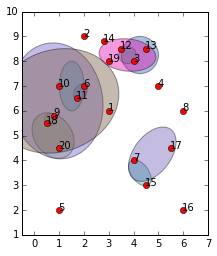

In [15]:
fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')

ax.plot(points.X, points.Y, 'ro')
ax.axis([min(points.X)-1, max(points.X)+1, min(points.Y)-1, max(points.Y)+1])
for i, txt in enumerate(points.index):
    ax.annotate(txt+1, (points.X[i],points.Y[i]))
ax.add_artist(EclispeInfo(17,8))
ax.add_artist(EclispeInfo(5,10))
ax.add_artist(EclispeInfo(2,11))
ax.add_artist(EclispeInfo(6,14))
ax.add_artist(EclispeInfo(17,19,1))
ax.add_artist(EclispeInfo(5,9,1))
ax.add_artist(EclispeInfo(2,12,1))
ax.add_artist(EclispeInfo(6,16,1))
ax.add_artist(EclispeInfo(8,9,3.5,0.5))
ax.add_artist(EclispeInfo(8,9,3.9))
ax.add_artist(EclispeInfo(12,18,0.8,2.6))
#And So On I stopped due unclearity of the plot after a while.
plt.show()

In [40]:
distances[(15,8)]

6.4404968752418474